In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
from random import randint


df['convert'] = [randint(0,1) for i in range(41188)]

In [ ]:
plt.figure(figsize=(8,6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid()

In [ ]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head(10)

## Линейный

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(data['month'], data['count'])
plt.title('ohvat')
plt.xlabel('month')
plt.ylabel('num_clients')
plt.grid()

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data['month'], y=data['count'])
plt.title('ohvat')
plt.xlabel('month')
plt.ylabel('num_clients')
plt.grid()

## Гистограмма

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=15)
plt.title('age_cli')
plt.xlabel('interval')
plt.ylabel('num_clients');

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=15)
plt.title('age_cli')
plt.xlabel('interval')
plt.ylabel('num_clients');

In [35]:
data_1 = df.groupby('age')['convert'].sum().reset_index()

## Диаграмма рассеяния

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data_1['age'], data_1['convert'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data_1['age'], y=data_1['convert'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

## Столбчатые диаграммы

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(data_1['age'], data_1['convert'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');
plt.xticks(rotation=30);

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=data_1['age'], y=data_1['convert'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');
plt.xticks(rotation=30);

In [66]:
data3 = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data3.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data3.head()

convert,job,no,yes
0,admin.,5222,5200
1,blue-collar,4629,4625
9,technician,3367,3376
7,services,1984,1985
4,management,1463,1461


## Многорядовые столбчатые диаграммы

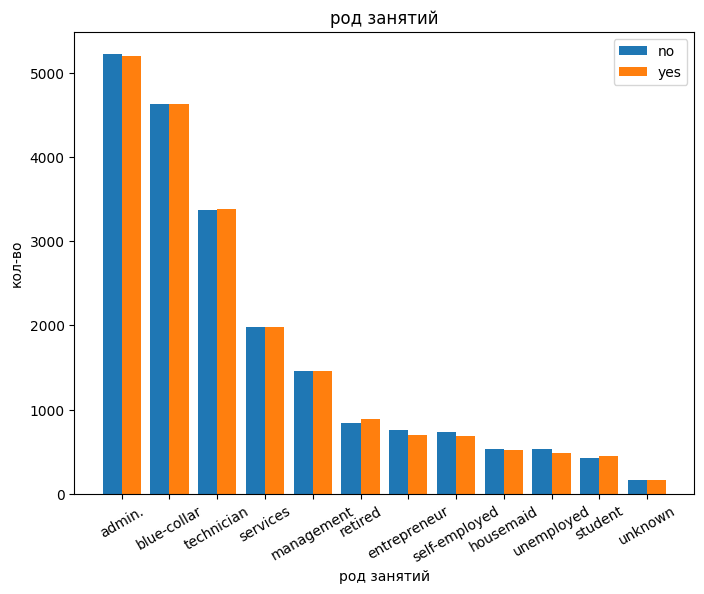

In [71]:
plt.figure(figsize=(8,6))
n_ticks = np.arange(len(data3['no']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data3['no'], width=w)
plt.bar(n_ticks + offset, data3['yes'], width=w)
plt.title('род занятий')
plt.xlabel('род занятий')
plt.ylabel('кол-во')
plt.legend(['no','yes'])
plt.xticks(n_ticks, data3['job'], rotation=30);